In [2]:
from glob import glob
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom
import xarray as xr
import matplotlib.pyplot as plt
import pickle
import gzip
import numpy
import netCDF4
import datetime
import os
from typing import Optional, Tuple

FMT = '%Y-%m-%dT%H:%M:%S.%fZ'

In [3]:

def plot_uv_map(uv,lon2D,lat2D,cmap=plt.cm.RdBu_r,vmax=1,vmin=-1,title=None,colorbar_title="norm(U) [m/s]",axs=None,fig=None,colorbar=True,lat_mask=None):

    if not axs:

        fig, axs = plt.subplots(nrows=1,ncols=1,
                            subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(11*1,5*1))

    axs.add_feature(
    cfeature.LAND,
    facecolor='lightgray',  # Couleur de remplissage
    edgecolor='black',      # Couleur des bordures (optionnel)
    zorder=2                # Ordre de dessin (0 = en arrière-plan)
    )
    
    if lat_mask is not None:
        axs.hlines(lat_mask,np.min(lon2D),np.max(lon2D),color='k', alpha=1, linestyle='--')
        axs.hlines(-lat_mask,np.min(lon2D),np.max(lon2D),color='k', alpha=1, linestyle='--')

    if title:
        axs.set_title(title)

    #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    p0 = axs.pcolormesh(lon2D, lat2D, uv, cmap=cmap,vmax=vmax,vmin=vmin)  

    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

    # optional add grid lines
    p0.axes.gridlines(color='black', alpha=0., linestyle='--')

    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=0.2, color='black', alpha=0.8, linestyle='--')
    # adjust labels to taste
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    #gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    #gl.xlocator = mticker.FixedLocator([-180, -60, 0,  60, 180])
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height

    if colorbar:
        #create new axes where the colorbar should go.
        #it should be next to the original axes and have the same height!
        pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
        cbar=plt.colorbar(p0, cax=pos_cax)
        cbar.set_label(colorbar_title)

    #cax = fig.add_axes([0.92, 0.37, 0.02, 0.25])
    #cbar = fig.colorbar(p0, cax=axs, orientation='vertical')
    #cax.set_ylabel('Number of data', fontweight='bold')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
import cartopy.feature as cfeature

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.labelsize'] = 12  # Taille pour X et Y

box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, 0, 48, 68]

#list_box = [box_cal,box_med,box_gs,box_agulhas,box_NA]

def plot_map_zoom(var,lon,lat,title=None,vmax=None,vmin=None,colorbar_label=None,axs=None,fig=None,list_box=None,cmap='RdBu_r',lat_mask=None,lognorm=None):

    if not axs:
        fig, axs = plt.subplots(nrows=1,ncols=1,
                            subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(11*1.5,5*1.5))
    
    """
    axs.add_feature(
    cfeature.LAND,
    facecolor='lightgray',  # Couleur de remplissage
    edgecolor='black',      # Couleur des bordures (optionnel)
    zorder=2                # Ordre de dessin (0 = en arrière-plan)
    )
    """
    import cartopy
    # projection = cartopy.crs.Mercator()
    axs.add_feature(cartopy.feature.LAND, zorder=3)
    axs.add_feature(cartopy.feature.COASTLINE, zorder=3)
    axs.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=3)
    axs.add_feature(cartopy.feature.RIVERS, zorder=3)

    for spine in axs.spines.values():
        spine.set_zorder(11)  # zorder élevé pour que les bords soient au-dessus des autres éléments

        #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    #vmax_glob=np.nanmax(var)
    #vmin_glob=np.nanmin(var)
    if lat_mask is not None:
        axs.hlines(lat_mask,-180,180,color='k', alpha=1, linestyle='--')
        axs.hlines(-lat_mask,-180,180,color='k', alpha=1, linestyle='--')

    if lognorm:
        p0 = axs.pcolormesh(lon, lat, var, cmap=cmap,norm=LogNorm(vmin=vmin, vmax=vmax))
    else:  
        p0 = axs.pcolormesh(lon, lat, var, cmap=cmap,vmax=vmax,vmin=vmin,transform=ccrs.PlateCarree())

    if title:
        axs.set_title(title)

    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

    # optional add grid lines
    p0.axes.gridlines(color='k', alpha=0.2, linestyle='--', linewidth=1,zorder=10)
    
    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=0.2, color='black', alpha=0.8, linestyle='--')
    # adjust labels to taste
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = True
    gl.left_labels = True

    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
    """
    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height
    #create new axes where the colorbar should go.
    #it should be next to the original axes and have the same height!
    pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
    cbar=plt.colorbar(p0, cax=pos_cax)

    """
    # Get size and extent of axes
    axpos = axs.get_position()

    # Define position for the horizontal colorbar (bottom)
    pos_x = axpos.x0  # Align with the left edge of the main axes
    pos_y = axpos.y0 - 0.05  # Place below the main axes
    cax_width = axpos.width  # Same width as the main axes
    cax_height = 0.02  # Small height for the colorbar

    # Add the horizontal colorbar
    if colorbar_label:
        # Create new axes for the horizontal colorbar
        pos_cax = fig.add_axes([pos_x, pos_y, cax_width, cax_height])
        cbar = plt.colorbar(p0, cax=pos_cax, orientation='horizontal')
        cbar.set_label(colorbar_label)

    if list_box:
        i=0
        for zoom_extent in list_box : 
            
            # Ajouter les contours de la zone zoomée sur la carte principale
            zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                                    zoom_extent[1] - zoom_extent[0],
                                    zoom_extent[3] - zoom_extent[2],
                                    linewidth=2, edgecolor='k', facecolor='none',
                                    transform=ccrs.PlateCarree())
            
            
            axs.add_patch(zoom_rect)
            center_lon = (zoom_extent[0] + zoom_extent[1]) / 2
            axs.text(center_lon, zoom_extent[2] - 10 ,  # Position légèrement au-dessus de la boîte
                    list_box_str[i],  # Texte à afficher
                    transform=ccrs.PlateCarree(),
                    fontsize=14,
                    fontweight='bold',  # Texte en gras
                    bbox=dict(facecolor='white', alpha=0, edgecolor='none'),
                    ha='center', va='bottom')
            i+=1

In [5]:
box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, 0, 48, 68]

box_hawai = [-170, -120, 10, 40]
box_canari = [-40, -5, 10, 35]

list_box = [box_hawai,box_canari,box_gs,box_agulhas]
list_box_str = ["HW","CN","GS","AG"]

In [6]:
histogram_da_train = xr.open_dataset('histogram_da_2010_2018.nc')
histogram_da_train_np = histogram_da_train.__xarray_dataarray_variable__.values

In [7]:
histogram_da_train

<xarray.Dataset> Size: 8MB
Dimensions:                        (lat_bin: 679, lon_bin: 1440)
Coordinates:
  * lat_bin                        (lat_bin) float64 5kB -80.12 -79.87 ... 89.87
  * lon_bin                        (lon_bin) float64 12kB -180.1 ... 179.8
Data variables:
    __xarray_dataarray_variable__  (lat_bin, lon_bin) float64 8MB 0.0 ... 0.0

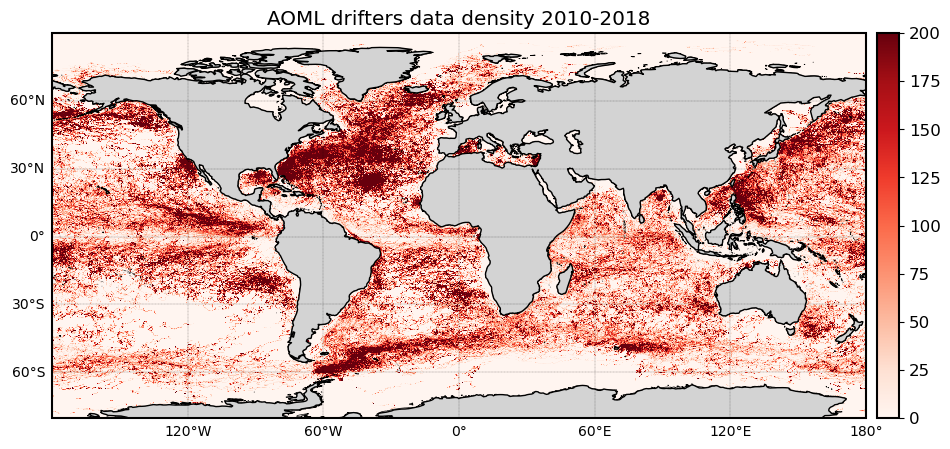

In [8]:
plot_uv_map(histogram_da_train_np,histogram_da_train.lon_bin,histogram_da_train.lat_bin,vmin=0,vmax=200,colorbar_title=None,cmap=plt.cm.Reds,title=f"AOML drifters data density 2010-2018")
#plt.savefig(f"figures/hist_drifter_aoml_{year_start}-{year_end}.png")
#plt.show()

In [1]:
box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, -43, 25, 46.5 ]
box_agulhas = [11, 33, -44, -27]
box_NA = [-40, 0, 48, 68]

box_hawai = [-170, -120, 10, 40]
box_canari = [-40, -5, 10, 35]

list_box = [box_hawai,box_canari,box_gs,box_agulhas]
list_box_str = ["HW","CN","GS","AG"]

list_box = [box_hawai,box_gs,box_agulhas]
list_box_str = ["HW","GS","AG"]

In [11]:
list_box = [box_hawai,box_gs,box_agulhas]
list_box_str = ["HW","GS","AG"]

In [9]:
histogram_da_val = xr.open_dataset('histogram_da_2019.nc')
histogram_da_val_np = histogram_da_val.__xarray_dataarray_variable__.values

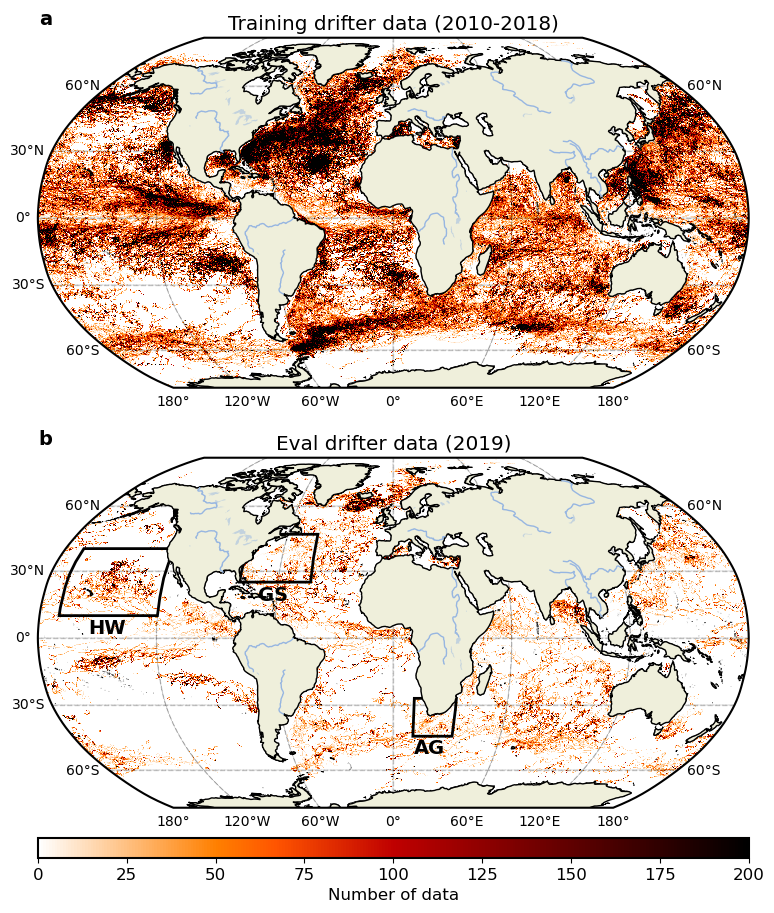

In [12]:
# Compare map 
cmap=plt.cm.gist_heat_r
#cmap=plt.cm.BuPu
#cmap=plt.cm.jet

vmax=200
import cartopy.crs as ccrs
fig, axs = plt.subplots(nrows=2,ncols=1,
                    subplot_kw={'projection': ccrs.Robinson()},
                    figsize=(11*1,5*2))

plot_map_zoom(histogram_da_train_np,histogram_da_train.lon_bin,histogram_da_train.lat_bin,vmin=0,vmax=vmax,cmap=cmap,title=f"Training drifter data (2010-2018)",fig=fig,axs=axs[0])

#1plot_map_zoom(histogram_da_train_np,histogram_da_train.lon_bin,histogram_da_train.lat_bin,vmin=0,vmax=100,cmap=plt.cm.Reds,title=f"AOML drifters data density 2010-2018",fig=fig,axs=axs[0],colorbar=None)
axs[0].text(0.02, 1.08, "a", transform=axs[0].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))

plot_map_zoom(histogram_da_val_np,histogram_da_val.lon_bin,histogram_da_val.lat_bin,vmin=0,vmax=vmax,cmap=cmap,title="Eval drifter data (2019)",list_box=list_box,fig=fig,axs=axs[1],colorbar_label="Number of data")
axs[1].text(0.02, 1.08, "b", transform=axs[1].transAxes, fontsize=14, fontweight='bold', va='top', ha='right', bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))

plt.savefig("../figures/Figure_drif.png",dpi=300,bbox_inches='tight')                                                                                                                                                                      